In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/Energy_dataset.csv")

In [34]:
df.head(5)

,srcStateName,srcYear,Region-wise installation of electricity,"Energy Value Type ( Potential, Capacity, Generation )",Types of Energy Sources,Nature of Energy Sources,Values for renewable electricity,"Types of Usage (Utility ,Captive)",Type of Energy Sector,YearCode,Year
0,BIHAR,2013,NaN,Generation,COAL,NON-RENEWABLE,155.200,CAPTIVE,CAPTIVE,2013,"Financial Year (Apr - Mar), 2013"
1,ANDHRA PRADESH,2015,NaN,Generation,SMALL HYDRO,RENEWABLE,98.783,UTILITY,UTILITY-RE,2015,"Financial Year (Apr - Mar), 2015"
2,SIKKIM,2016,NaN,Generation,COAL,NON-RENEWABLE,0.000,CAPTIVE,CAPTIVE,2016,"Financial Year (Apr - Mar), 2016"
3,UTTARAKHAND,2020,NR,Capacity,COGENERATION-BAGASSE,NaN,130.500,NaN,NaN,2020,"Financial Year (Apr - Mar), 2020"
4,MAHARASHTRA,2018,NaN,Generation,HYDRO,NON-RENEWABLE,22.210,CAPTIVE,CAPTIVE,2018,"Financial Year (Apr - Mar), 2018"


## Filtering out RENEWABLE Energy sources 

In [28]:
df_renewable = df[df['Nature of Energy Sources'] == 'RENEWABLE']
df_renewable.head(5)

,srcStateName,srcYear,Region-wise installation of electricity,"Energy Value Type ( Potential, Capacity, Generation )",Types of Energy Sources,Nature of Energy Sources,Values for renewable electricity,"Types of Usage (Utility ,Captive)",Type of Energy Sector,YearCode,Year
1,ANDHRA PRADESH,2015,NaN,Generation,SMALL HYDRO,RENEWABLE,98.783,UTILITY,UTILITY-RE,2015,"Financial Year (Apr - Mar), 2015"
6,CHHATTISGARH,2020,WR,Potential,WIND,RENEWABLE,348.000,NaN,NaN,2020,"Financial Year (Apr - Mar), 2020"
9,CHHATTISGARH,2019,NaN,Generation,WIND,RENEWABLE,0.000,UTILITY,UTILITY-RE,2019,"Financial Year (Apr - Mar), 2019"
11,DADRA & NAGAR HAVELI,2018,NaN,Generation,SOLAR,RENEWABLE,5.240,UTILITY,UTILITY-RE,2018,"Financial Year (Apr - Mar), 2018"
13,DADRA & NAGAR HAVELI,2016,NaN,Generation,WIND,RENEWABLE,0.000,CAPTIVE,CAPTIVE,2016,"Financial Year (Apr - Mar), 2016"


## Feature selection and replacing missing value 

In [30]:
print(df_renewable.isnull().sum()) 

srcStateName                                                0
srcYear                                                     0
Region-wise installation of electricity                  2395
Energy Value Type ( Potential, Capacity, Generation )       0
Types of Energy Sources                                     0
Nature of Energy Sources                                    0
Values for renewable electricity                            0
Types of Usage (Utility ,Captive)                         692
Type of Energy Sector                                     692
YearCode                                                    0
Year                                                        0
dtype: int64


In [33]:
#removing unnecessary columns
df_cleaned = df_renewable.drop(columns=[
    'Region-wise installation of electricity',   
    'Types of Usage (Utility ,Captive)',           
    'Type of Energy Sector'                        
])
df_cleaned = df_cleaned.fillna({
    'Values for renewable electricity': 0,    # Fill missing renewable electricity values with 0
    'Types of Energy Sources': 'Unknown'      # If there are missing energy types, fill with 'Unknown'
})
print(df_cleaned.isnull().sum())

srcStateName                                             0
srcYear                                                  0
Energy Value Type ( Potential, Capacity, Generation )    0
Types of Energy Sources                                  0
Nature of Energy Sources                                 0
Values for renewable electricity                         0
YearCode                                                 0
Year                                                     0
dtype: int64


## State-wise Renewable Energy => Bar graph 

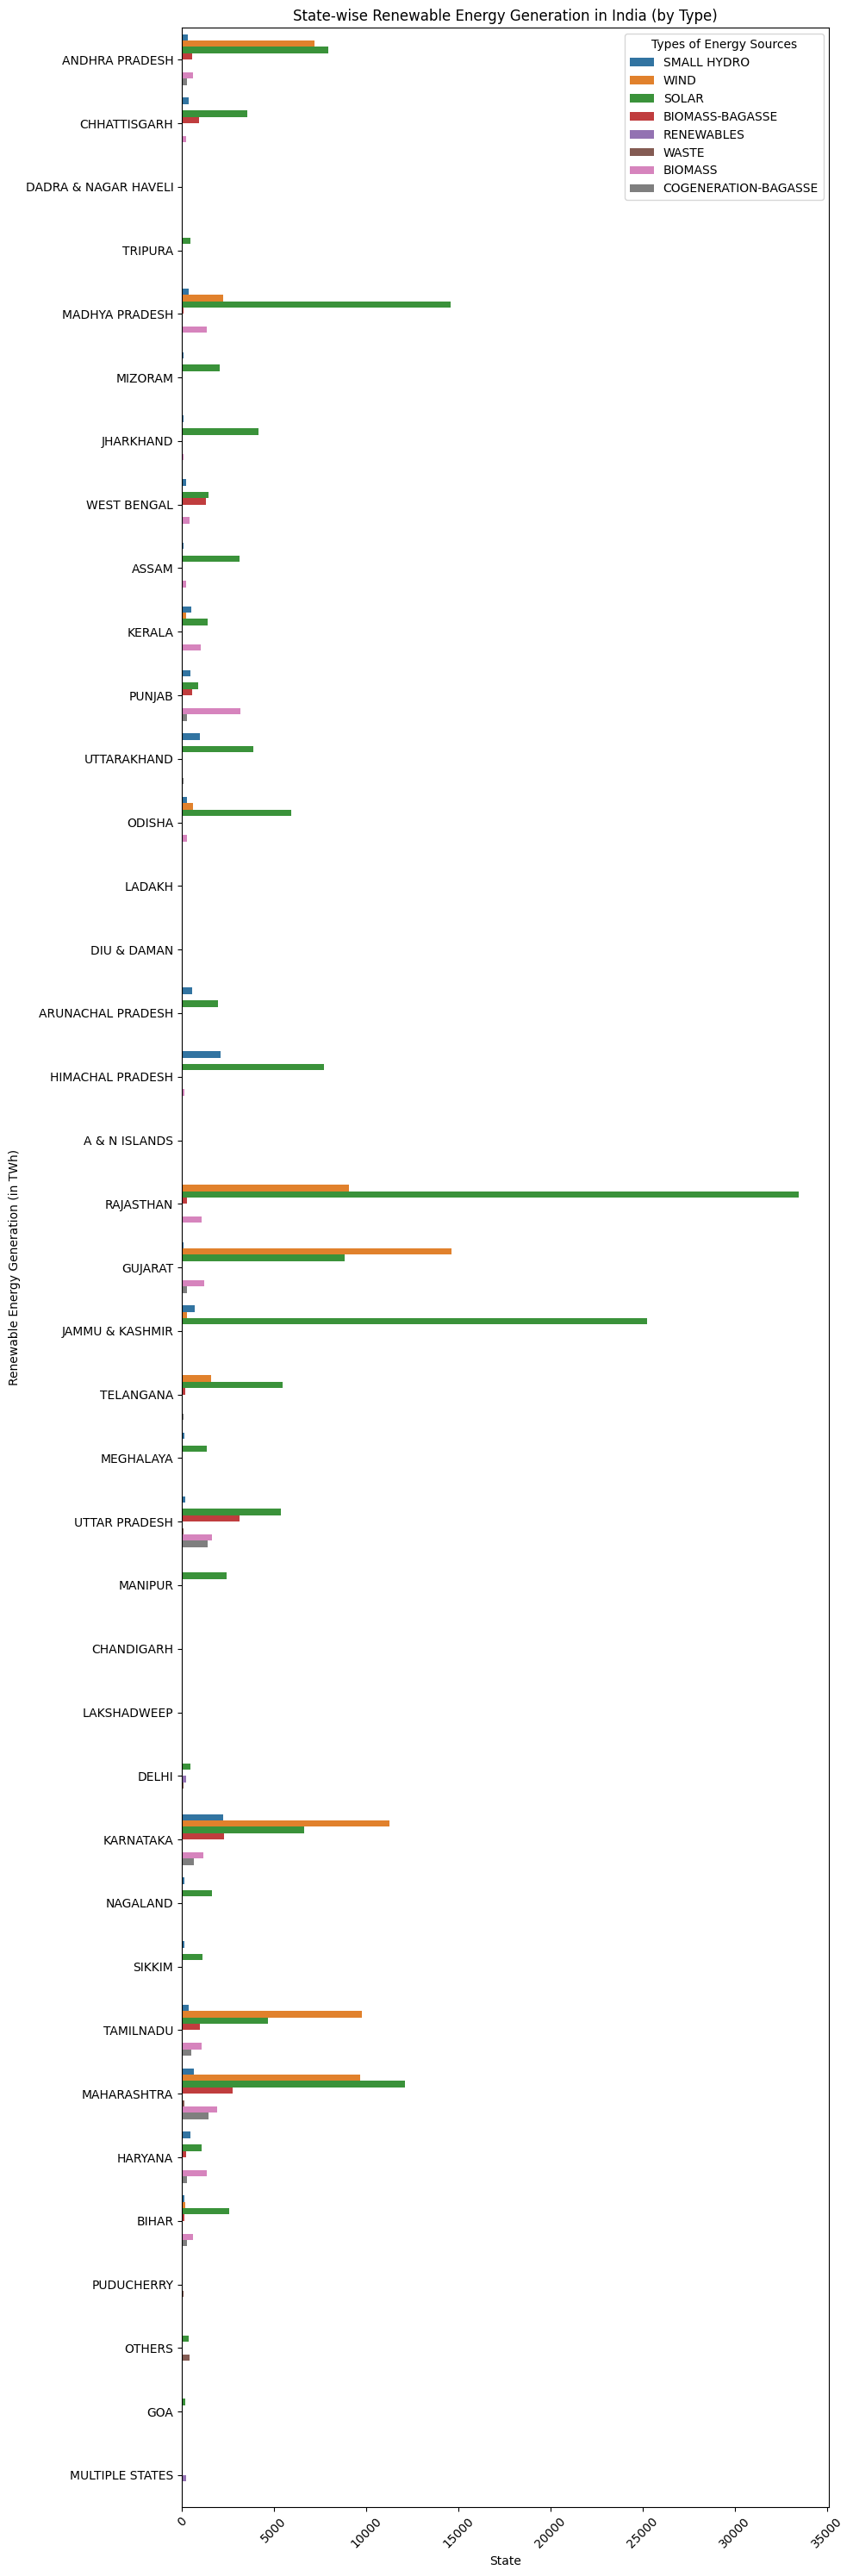

In [19]:
plt.figure(figsize=(10, 30))
sns.barplot(data=df_renewable, y='srcStateName', x='Values for renewable electricity', hue='Types of Energy Sources', errorbar=None)
plt.title('State-wise Renewable Energy Generation in India (by Type)')
plt.xlabel('State')
plt.ylabel('Renewable Energy Generation (in TWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Yearly rise/fall in renewable energy usage in India 

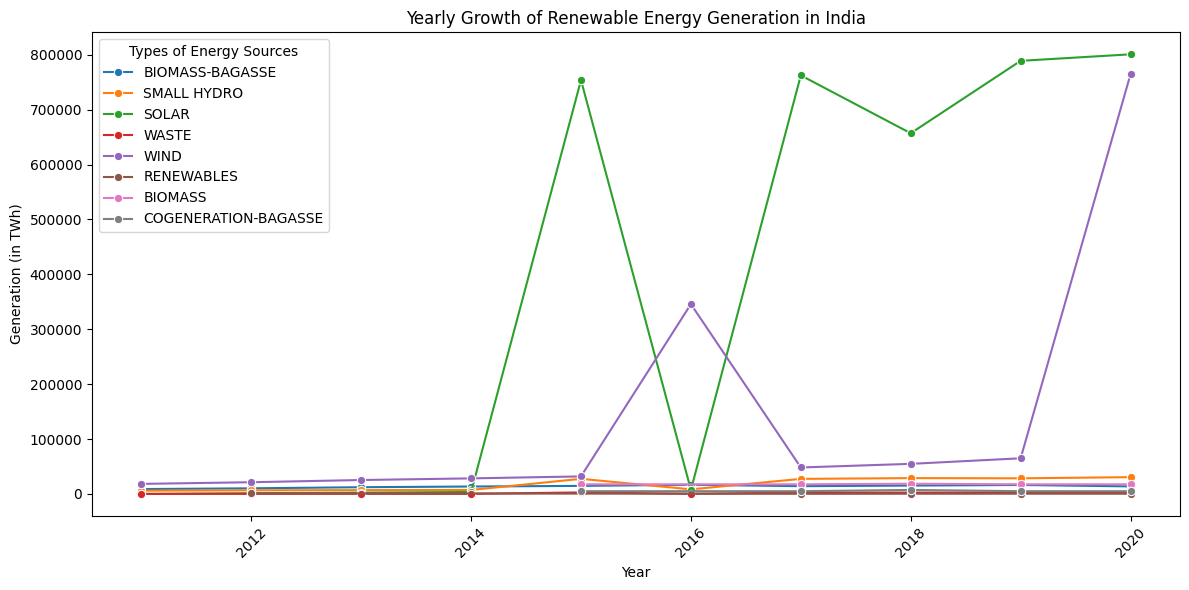

In [23]:
df_yearly = df_renewable.groupby(['srcYear', 'Types of Energy Sources']).agg(
    total_generation=('Values for renewable electricity', 'sum')
).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly, x='srcYear', y='total_generation', hue='Types of Energy Sources', marker='o')
plt.title('Yearly Growth of Renewable Energy Generation in India')
plt.xlabel('Year')
plt.ylabel('Generation (in TWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## State Contribution to Renewable Energy Generation

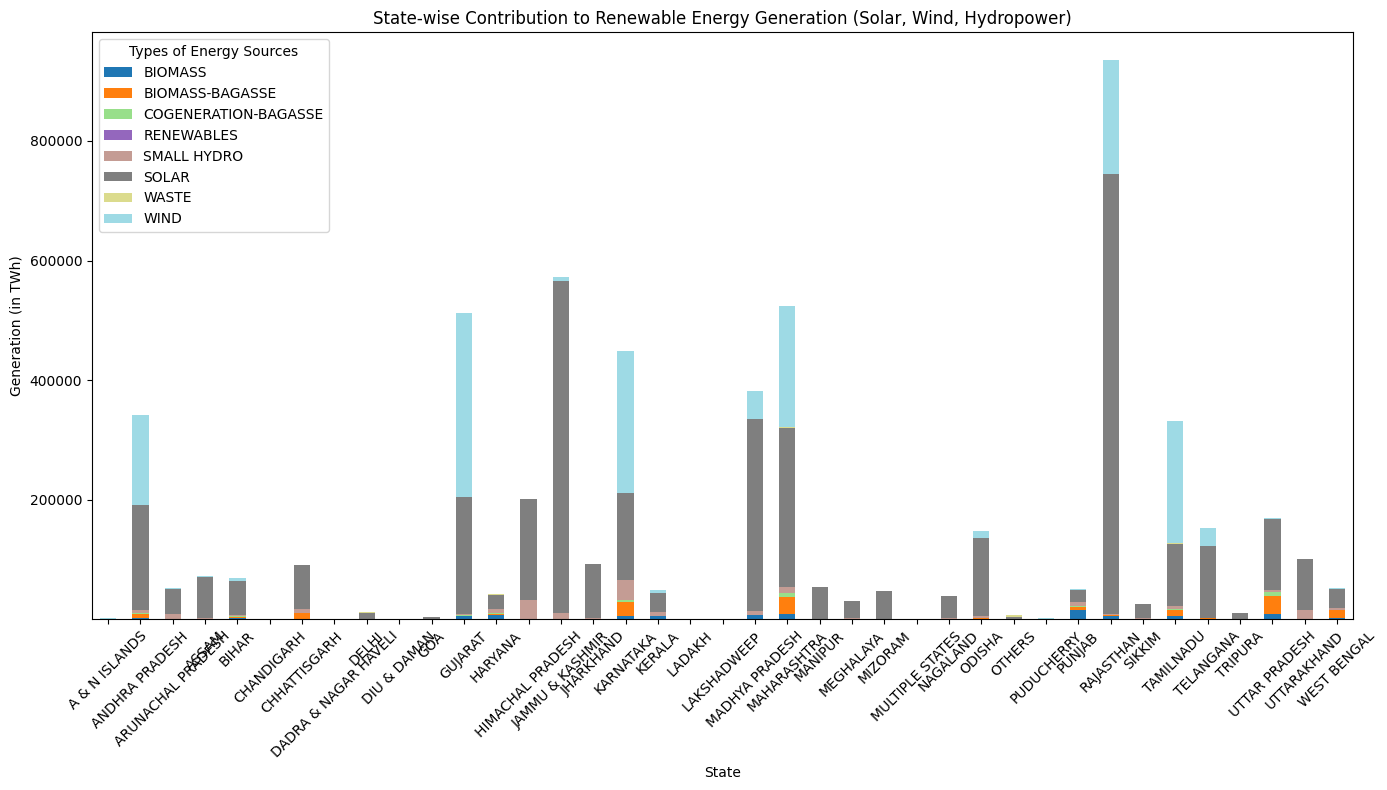

In [25]:

df_state_contribution = df_renewable.groupby(['srcStateName', 'Types of Energy Sources']).agg(
    total_generation=('Values for renewable electricity', 'sum')
).unstack().fillna(0)

df_state_contribution.columns = df_state_contribution.columns.droplevel()
df_state_contribution.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('State-wise Contribution to Renewable Energy Generation (Solar, Wind, Hydropower)')
plt.xlabel('State')
plt.ylabel('Generation (in TWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

1. Solar energy is the fastest-growing renewable energy sector in India, driven by favorable government policies and technological advancements that have made solar power more affordable and scalable.
2. Wind energy is also on the rise, although at a slower pace compared to solar. There is significant potential for growth, particularly in states like Tamil Nadu, Gujarat, and Maharashtra.
3. States with a strong commitment to renewable energy, such as Tamil Nadu, Gujarat, and Rajasthan, are leading the way, while other states can catch up by implementing supportive policies, increasing investments, and focusing on renewable energy infrastructure.